### Sales Data Analysis

This notebook explores the analysis of sales data using the data science popular libraries like pandas, numpy and matplotlib.

We have answered these 5 questions through our data analysis mainly using pandas and matplotlib library.

Q1. What is the overall sales trend?
Q2. Which are the Top 10 products by sales?
Q3. Which are the Most Selling Products?
Q4. Which is the most preferred Ship Mode?
Q5. Which are the Most Profitable Category and Sub-Category?

In [1]:
# required libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
!pip install xlrd

In [3]:
# read the excel file with sales data

df_sales = pd.read_excel('superstore_sales.xlsx')
df_sales.head(5)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [4]:
# A brief summary of the data
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [5]:
# check for missing values
df_sales.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [6]:
# what columns are in this dataset
df_sales.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

<h4> Exploratory Data Analysis </h4>


##### what is the overall sales trend?

In [7]:
df_sales['order_date'].min()

Timestamp('2011-01-01 00:00:00')

In [8]:
df_sales['order_date'].max()

Timestamp('2014-12-31 00:00:00')

it means the data is between 2011 to 2014


In [9]:
# getting only month-year from the order date in a new column

df_sales['month_year'] = df_sales['order_date'].apply(lambda x: x.strftime('%Y-%m'))

In [10]:
# Grouping sales on the month-year columns
trend_df = df_sales.groupby('month_year').count()['sales'].reset_index()

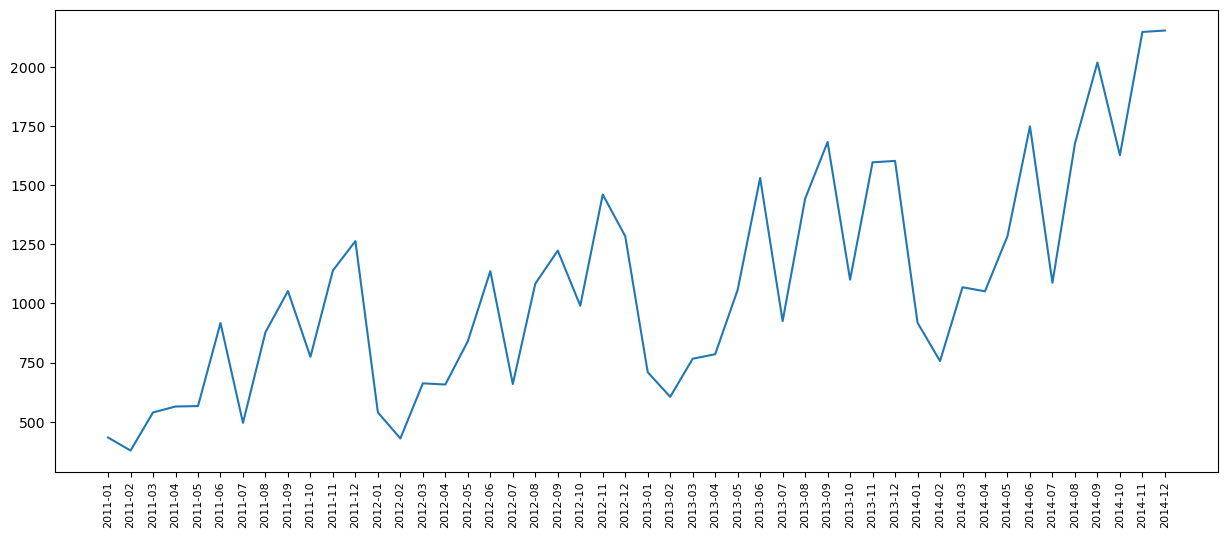

In [11]:
# setting the plot for this trend
plt.figure(figsize=(15,6))
plt.plot(trend_df['month_year'], trend_df['sales'])
plt.xticks(rotation='vertical', size=8)
plt.show()

From this we see that the initial four months, the sales are slow but later picked up...

##### which are the top 10 products by sales?

In [12]:
# Grouping product name by sales

top10 = pd.DataFrame(df_sales.groupby('product_name').sum(numeric_only=True)['sales'])
top10

,sales
product_name,
"""While you Were Out"" Message Book, One Form per Page",25.228
"#10 Gummed Flap White Envelopes, 100/Box",41.300
#10 Self-Seal White Envelopes,108.682
"#10 White Business Envelopes,4 1/8 x 9 1/2",488.904
"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",286.672
...,...
"iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4",477.660
iOttie HLCRIO102 Car Mount,215.892
iOttie XL Car Mount,223.888


In [13]:
top10_df = top10.sort_values('sales', ascending=False)[:10]
top10_df

,sales
product_name,
"Apple Smart Phone, Full Size",86935.7786
"Cisco Smart Phone, Full Size",76441.5306
"Motorola Smart Phone, Full Size",73156.3030
"Nokia Smart Phone, Full Size",71904.5555
Canon imageCLASS 2200 Advanced Copier,61599.8240
"Hon Executive Leather Armchair, Adjustable",58193.4841
"Office Star Executive Leather Armchair, Adjustable",50661.6840
"Harbour Creations Executive Leather Armchair, Adjustable",50121.5160
"Samsung Smart Phone, Cordless",48653.4600


##### which are the most selling products?

In [14]:
# grouping the product name
most_selling_df = pd.DataFrame(df_sales.groupby('product_name').count()['quantity'])

In [15]:
most_selling_df = most_selling_df.sort_values('quantity', ascending=False)[:10]
most_selling_df

,quantity
product_name,
Staples,227
"Cardinal Index Tab, Clear",92
"Eldon File Cart, Single Width",90
"Rogers File Cart, Single Width",84
"Ibico Index Tab, Clear",83
"Sanford Pencil Sharpener, Water Color",80
"Smead File Cart, Single Width",77
"Stanley Pencil Sharpener, Water Color",75
"Acco Index Tab, Clear",75


Q5. What is the most preferred ship mode?

In [40]:
most_preferred_shp_df = pd.DataFrame(df_sales['ship_mode'].value_counts()).reset_index()
most_preferred_shp_df

,ship_mode,count
0,Standard Class,30775
1,Second Class,10309
2,First Class,7505
3,Same Day,2701


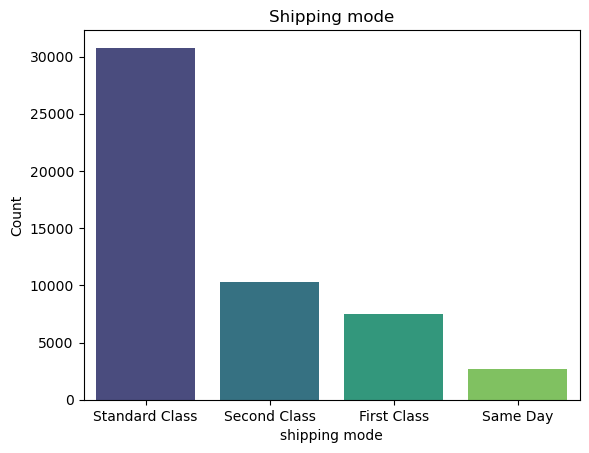

In [41]:
# Plot the barchart
sns.barplot(data=most_preferred_shp_df, x='ship_mode', y='count', palette='viridis')

plt.title('Shipping mode')
plt.ylabel('Count')
plt.xlabel('shipping mode')
plt.show()

In [29]:
most_preferred_shp_df.idxmax()

count    Standard Class
dtype: object

From here, we see that 'Standard Class' is the most preferred ship mode

Which are the most profitable category and sub-category?

In [36]:
cat_subcat = pd.DataFrame(df_sales.groupby(['category', 'sub_category']).sum(numeric_only=True)['profit'])
cat_subcat

profit
category        sub_category              
Furniture       Bookcases     161924.41950
                Chairs        141973.79750
                Furnishings    46967.42550
                Tables        -64083.38870
Office Supplies Appliances    141680.58940
                Art            57953.91090
                Binders        72449.84600
                Envelopes      29601.11630
                Fasteners      11525.42410
                Labels         15010.51200
                Paper          59207.68270
                Storage       108461.48980
                Supplies       22583.26310
Technology      Accessories   129626.30620
                Copiers       258567.54818
                Machines       58867.87300
                Phones        216717.00580

In [37]:
cat_subcat.sort_values(['category', 'sub_category'], ascending=False)

profit
category        sub_category              
Technology      Phones        216717.00580
                Machines       58867.87300
                Copiers       258567.54818
                Accessories   129626.30620
Office Supplies Supplies       22583.26310
                Storage       108461.48980
                Paper          59207.68270
                Labels         15010.51200
                Fasteners      11525.42410
                Envelopes      29601.11630
                Binders        72449.84600
                Art            57953.91090
                Appliances    141680.58940
Furniture       Tables        -64083.38870
                Furnishings    46967.42550
                Chairs        141973.79750
                Bookcases     161924.41950